# Fetal Health Classification

In [1]:
# Import necessities
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data

In [2]:
df = pd.read_csv("fetal_health.csv")

In [3]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [4]:
df.shape

(2126, 22)

## Exploratory Analysis

### Drop Duplicate values

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.shape

(2113, 22)

### Handling Null values

In [7]:
df.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

### Handling Outliers

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2113 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2113 non-null   float64
 1   accelerations                                           2113 non-null   float64
 2   fetal_movement                                          2113 non-null   float64
 3   uterine_contractions                                    2113 non-null   float64
 4   light_decelerations                                     2113 non-null   float64
 5   severe_decelerations                                    2113 non-null   float64
 6   prolongued_decelerations                                2113 non-null   float64
 7   abnormal_short_term_variability                         2113 non-null   float64
 8   mean_value_of_short_term_variability       

In [9]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,...,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000
mean,133.304780,0.003188,0.009517,0.004387,0.001901,0.000003,0.000159,46.993848,1.335021,9.795078,...,93.564600,164.099858,4.077142,0.325603,137.454330,134.599621,138.089446,18.907241,0.318504,1.303833
std,9.837451,0.003871,0.046804,0.002941,0.002966,0.000057,0.000592,17.177782,0.884368,18.337073,...,29.562269,17.945175,2.951664,0.707771,16.402026,15.610422,14.478957,29.038766,0.611075,0.614279
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.000000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.005000,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,...,93.000000,162.000000,4.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.000000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.000000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


Used a function to remove outliers from all numeric columns of any dataframe using the IQR formula.
Here's the Formula:
1. **Lower Bound = Q1 - (1.5 * IQR)**
2. **Upper Bound = Q3 + (1.5 * IQR)**

Any data point outside this boundary are considered as outliers

In [10]:
# A function to remove outliers
def remove_outliers_all_numeric(df, target_col):
    df_clean = df.copy()

    for col in df_clean.select_dtypes(include='number').columns:
        if col == target_col:
            continue  # skip target column

        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        df_clean = df_clean[
            (df_clean[col] >= lower) & 
            (df_clean[col] <= upper)
        ]

    return df_clean


In [11]:
df1 = remove_outliers_all_numeric(df, 'fetal_health')

In [12]:
df1.shape

(903, 22)

In [13]:
df1.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,903.000000,903.000000,903.000000,903.000000,903.000000,903.0,903.0,903.000000,903.000000,903.00000,...,903.000000,903.000000,903.000000,903.0,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000
mean,134.177187,0.003145,0.000704,0.004480,0.000561,0.0,0.0,46.933555,0.984939,7.72979,...,108.165006,159.651163,2.807309,0.0,140.052049,138.957918,140.832780,5.642303,0.264673,1.176080
std,10.204975,0.003572,0.001516,0.002735,0.001270,0.0,0.0,16.315216,0.486577,11.24481,...,23.830062,13.905650,2.161565,0.0,12.326155,11.854364,11.940064,5.728470,0.582204,0.427704
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,15.000000,0.200000,0.00000,...,50.000000,125.000000,0.000000,0.0,109.000000,110.000000,111.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.003000,0.000000,0.0,0.0,33.000000,0.600000,0.00000,...,93.000000,150.000000,1.000000,0.0,131.000000,130.000000,132.000000,1.000000,0.000000,1.000000
50%,135.000000,0.002000,0.000000,0.005000,0.000000,0.0,0.0,47.000000,0.900000,1.00000,...,112.000000,159.000000,2.000000,0.0,141.000000,140.000000,142.000000,3.000000,0.000000,1.000000
75%,142.000000,0.006000,0.000000,0.007000,0.000000,0.0,0.0,60.000000,1.300000,12.00000,...,126.000000,169.000000,4.000000,0.0,148.000000,147.000000,149.000000,8.000000,1.000000,1.000000
max,159.000000,0.015000,0.007000,0.012000,0.007000,0.0,0.0,86.000000,2.800000,40.00000,...,156.000000,199.000000,11.000000,0.0,170.000000,172.000000,174.000000,24.000000,1.000000,3.000000


### Scaling Data

In [14]:
target = df1["fetal_health"]
features = df1.drop("fetal_health", axis=1)

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [16]:
x = scaler.fit_transform(features)
y = target

## Imbalance Handling (Oversampling)

In [17]:
y.value_counts() # check for imbalance in data

fetal_health
1.0    761
2.0    125
3.0     17
Name: count, dtype: int64

In [18]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
x_resampled, y_resampled = ros.fit_resample(x, y)

In [19]:
y_resampled.value_counts()

fetal_health
3.0    761
1.0    761
2.0    761
Name: count, dtype: int64

In [20]:
y_resampled.shape

(2283,)

## Machine Learning Model Apply

### Splitting Train, Test Model

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=33)

In [22]:
x_train.shape

(1826, 21)

In [23]:
x_test.shape

(457, 21)

### Testing on different Models
For selecting the best model, we'll compare among four different classification models:
1. Logistic Regression
2. Support Vector Classifier
3. Decision Tree
4. Random Forest Classifier

For evaluation, we'll use different metrics such as:
1. Accuracy
2. Confusion Matrix
3. Precision
4. Recall
5. F1 Score
6. ROC-AUC Score

Based on these evaluation metrics, one final model to work on this task will be selected.

## Model - 1: Logistic Regression

In [24]:
class_names = [1.0, 2.0, 3.0]

In [25]:
from sklearn.linear_model import LogisticRegression
logisticModel = LogisticRegression()

In [26]:
logisticModel.fit(x_train, y_train)

LogisticRegression()

In [27]:
y_pred = logisticModel.predict(x_test)

#### Check if there is overfitting

In [28]:
train_score1 = logisticModel.score(x_train, y_train)
test_score1 = logisticModel.score(x_test, y_test)
print("Train accuracy: " + str(train_score1) + ", Test accuracy: " + str(test_score1))

Train accuracy: 0.9315443592552026, Test accuracy: 0.9277899343544858


### Plot Confusion Matrix

In [29]:
# A function to generate and visualize confusion metrics
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, class_names):
    """
    y_true      : true labels
    y_pred      : predicted labels
    class_names : list of class names
    """

    cm = confusion_matrix(y_true, y_pred)

    plt.figure()
    plt.imshow(cm)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.xticks(range(len(class_names)), class_names, rotation=45)
    plt.yticks(range(len(class_names)), class_names)

    # Add values inside cells
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i, j], ha="center", va="center")

    plt.colorbar()
    plt.tight_layout()
    plt.show()


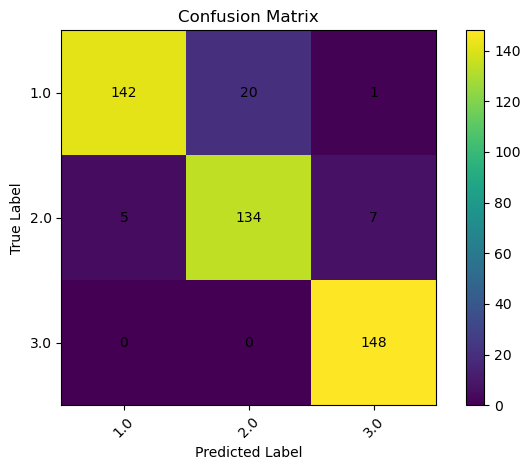

In [30]:
plot_confusion_matrix(y_test, y_pred, class_names)

### Classification Report

In [31]:
from sklearn.metrics import classification_report, accuracy_score

In [32]:
report = classification_report(y_test, y_pred)

In [33]:
print(report)

              precision    recall  f1-score   support

         1.0       0.97      0.87      0.92       163
         2.0       0.87      0.92      0.89       146
         3.0       0.95      1.00      0.97       148

    accuracy                           0.93       457
   macro avg       0.93      0.93      0.93       457
weighted avg       0.93      0.93      0.93       457



## ROC-AUC Curve

In [34]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

In [35]:
# A function to plot ROC curve
def plot_multiclass_roc(y_true, y_prob, class_names):

    n_classes = len(class_names)

    # Binarize the true labels
    y_true_bin = label_binarize(y_true, classes=range(n_classes))

    plt.figure()

    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_prob[:, i])
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, label=f"{class_names[i]} (AUC = {roc_auc:.3f})")

    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Multiclass ROC Curve (One-vs-Rest)")
    plt.legend()
    plt.show()


In [36]:
y_prob = logisticModel.predict_proba(x_test) # Probability of each prediction

C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


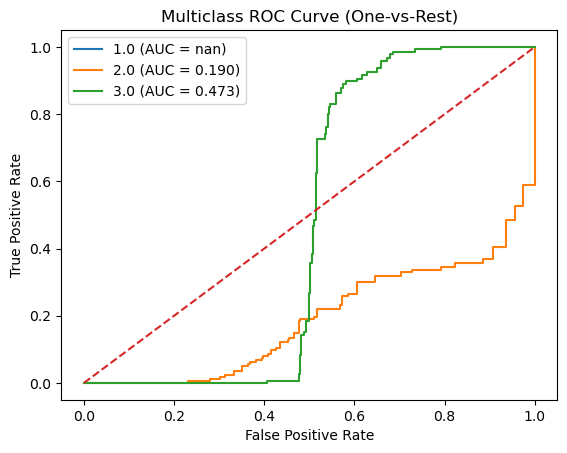

In [37]:
plot_multiclass_roc(y_test, y_prob, class_names)

### Overall ROC-AUC Score

In [38]:
from sklearn.metrics import roc_auc_score

auc_score = roc_auc_score(y_test, y_prob, multi_class='ovr')
print("Overall ROC-AUC:", auc_score)


Overall ROC-AUC: 0.988870931928012


## Model-02: Support Vector Classifier(SVC)

In [39]:
from sklearn.svm import SVC

svcModel = SVC(kernel='rbf', probability=True)

In [40]:
svcModel.fit(x_train, y_train)

SVC(probability=True)

In [41]:
y_pred2 = svcModel.predict(x_test)
y_prob2 = svcModel.predict_proba(x_test)

#### Check if there is overfitting

In [42]:
train_score2 = svcModel.score(x_train, y_train)
test_score2 = svcModel.score(x_test, y_test)
print("Train accuracy: " + str(train_score2) + ", Test accuracy: " + str(test_score2))

Train accuracy: 0.9474260679079957, Test accuracy: 0.949671772428884


### Plot Confusion matrix

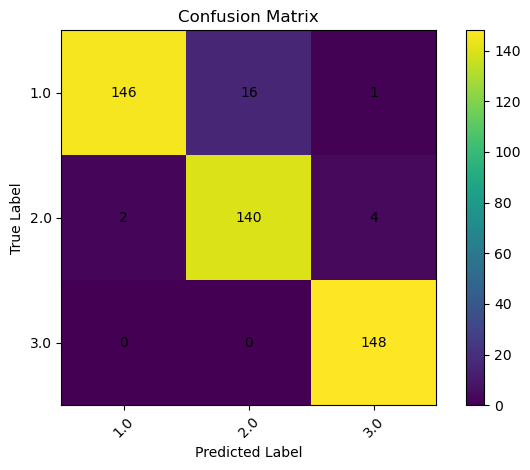

In [43]:
plot_confusion_matrix(y_test, y_pred2, class_names)

### Classification Matrix

In [44]:
report2 = classification_report(y_test, y_pred2)
print(report2)

              precision    recall  f1-score   support

         1.0       0.99      0.90      0.94       163
         2.0       0.90      0.96      0.93       146
         3.0       0.97      1.00      0.98       148

    accuracy                           0.95       457
   macro avg       0.95      0.95      0.95       457
weighted avg       0.95      0.95      0.95       457



### ROC Curve

C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


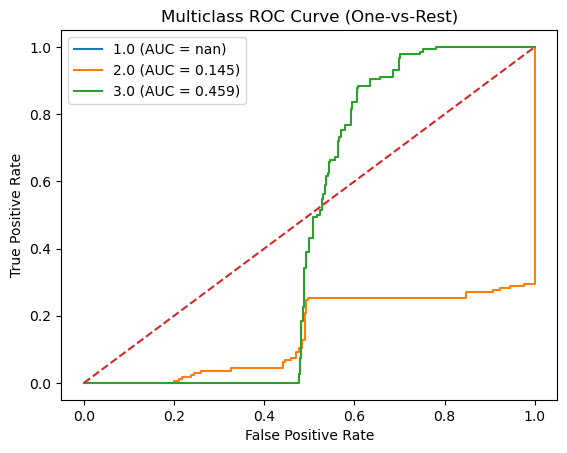

In [45]:
plot_multiclass_roc(y_test, y_prob2, class_names)

### Overall ROC-AUC Score

In [46]:
auc_score2 = roc_auc_score(y_test, y_prob2, multi_class='ovr')
print("Overall ROC-AUC:", auc_score)

Overall ROC-AUC: 0.988870931928012


## Model-03: Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier
treeModel = DecisionTreeClassifier()

In [48]:
treeModel.fit(x_train, y_train)

DecisionTreeClassifier()

In [49]:
y_pred3 = treeModel.predict(x_test)
y_prob3 = treeModel.predict_proba(x_test)

#### Check if there is overfitting

In [50]:
train_score3 = treeModel.score(x_train, y_train)
test_score3 = treeModel.score(x_test, y_test)
print("Train accuracy: " + str(train_score3) + ", Test accuracy: " + str(test_score3))

Train accuracy: 1.0, Test accuracy: 0.9824945295404814


### Plot Confusion Matrix

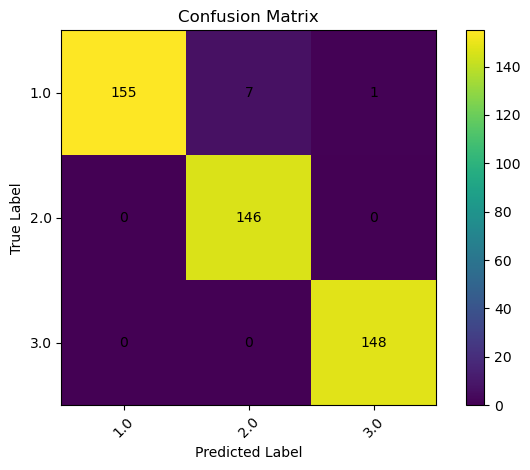

In [51]:
plot_confusion_matrix(y_test, y_pred3, class_names)

### Classification Report

In [52]:
report3 = classification_report(y_test, y_pred3)
print(report3)

              precision    recall  f1-score   support

         1.0       1.00      0.95      0.97       163
         2.0       0.95      1.00      0.98       146
         3.0       0.99      1.00      1.00       148

    accuracy                           0.98       457
   macro avg       0.98      0.98      0.98       457
weighted avg       0.98      0.98      0.98       457



### ROC Curve

C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


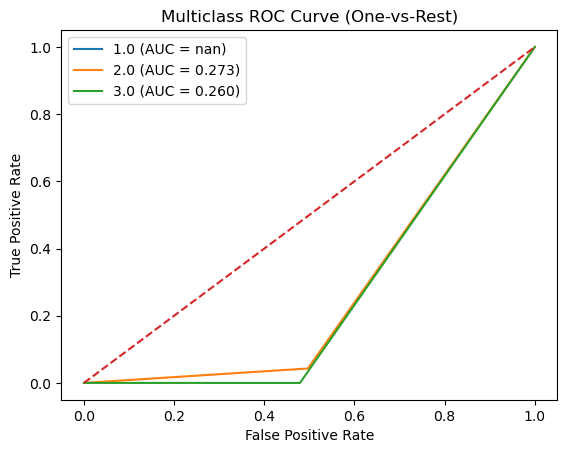

In [53]:
plot_multiclass_roc(y_test, y_prob3, class_names)

#### Overall ROC-AUC Score

In [54]:
auc_score3 = roc_auc_score(y_test, y_prob3, multi_class='ovr')
print("Overall ROC-AUC:", auc_score)

Overall ROC-AUC: 0.988870931928012


## Model-04: Random Forest Classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier
forestModel = RandomForestClassifier()

In [56]:
forestModel.fit(x_train, y_train)

RandomForestClassifier()

In [57]:
y_pred4 = forestModel.predict(x_test)
y_prob4 = forestModel.predict_proba(x_test)

#### Check if there is overfitting

In [58]:
train_score4 = forestModel.score(x_train, y_train)
test_score4 = forestModel.score(x_test, y_test)
print("Train accuracy: " + str(train_score4) + ", Test accuracy: " + str(test_score4))

Train accuracy: 1.0, Test accuracy: 0.9934354485776805


### Confusion Matrix

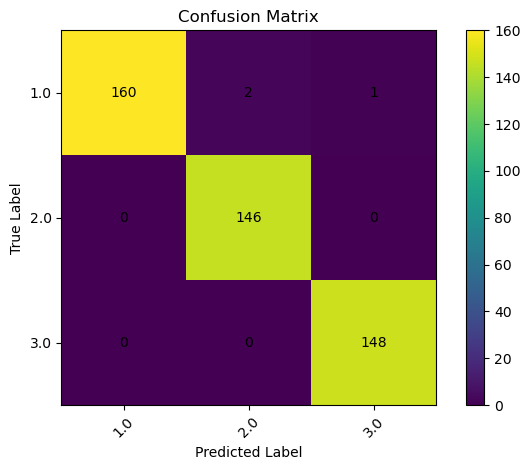

In [59]:
plot_confusion_matrix(y_test, y_pred4, class_names)

### Classification Report

In [60]:
report4 = classification_report(y_test, y_pred4)
print(report4)

              precision    recall  f1-score   support

         1.0       1.00      0.98      0.99       163
         2.0       0.99      1.00      0.99       146
         3.0       0.99      1.00      1.00       148

    accuracy                           0.99       457
   macro avg       0.99      0.99      0.99       457
weighted avg       0.99      0.99      0.99       457



### ROC Curve

C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


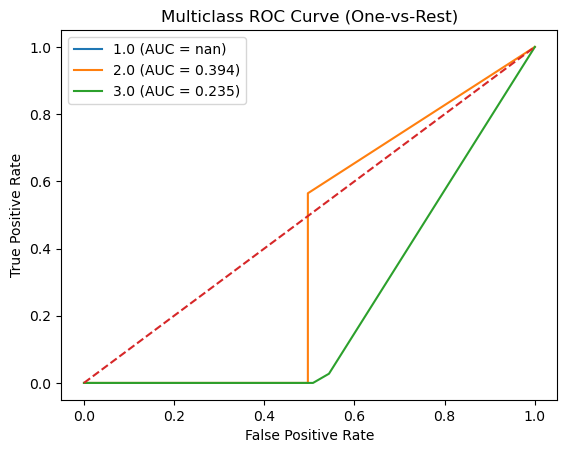

In [61]:
plot_multiclass_roc(y_test, y_prob4, class_names)

### Overall ROC-AUC Score

In [62]:
auc_score4 = roc_auc_score(y_test, y_prob4, multi_class='ovr')
print("Overall ROC-AUC:", auc_score)

Overall ROC-AUC: 0.988870931928012


## Final Model Selection

### Model Evaluation

Among the four models, **Random Forest** achieved the highest **Accuracy(0.99), Precision(0.99), Recall(0.99) and F1-score (0.99)**, with best precision and recall across all classes among the models.The confusion matrix shows fewer wrong predictions compared to other models.Though the ROC-AUC score is similar to all the models but other metrics are strongly suggesting Random Forest as the prefered model. Therefore, Random Forest is selected as the best-performing model for this task.

## Selected Model: Random Forest

### save model

In [63]:
import pickle

with open("fetal_health_classifier", "wb") as f:
    pickle.dump(forestModel, f)

In [64]:
with open("fetal_health_classifier", "rb") as f:
    model = pickle.load(f)

In [65]:
model.score(x_test, y_test)

0.9934354485776805